In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
'''boroughs = [
    "City and County of the City of London","Barking and Dagenham", "Barnet", "Bexley", "Brent", "Bromley", "Camden", 
    "Croydon", "Ealing", "Enfield", "Greenwich", "Hackney", "Hammersmith and Fulham", 
    "Haringey", "Harrow", "Havering", "Hillingdon", "Hounslow", "Islington", 
    "Kensington and Chelsea", "Kingston upon Thames", "Lambeth", "Lewisham", 
    "Merton", "Newham", "Redbridge", "Richmond upon Thames", "Southwark", "Sutton", 
    "Tower Hamlets", "Waltham Forest", "Wandsworth", "City of Westminster"
]'''

#removed the city of london
boroughs = [
    "Barking and Dagenham", "Barnet", "Bexley", "Brent", "Bromley", "Camden", 
    "Croydon", "Ealing", "Enfield", "Greenwich", "Hackney", "Hammersmith and Fulham", 
    "Haringey", "Harrow", "Havering", "Hillingdon", "Hounslow", "Islington", 
    "Kensington and Chelsea", "Kingston upon Thames", "Lambeth", "Lewisham", 
    "Merton", "Newham", "Redbridge", "Richmond upon Thames", "Southwark", "Sutton", 
    "Tower Hamlets", "Waltham Forest", "Wandsworth", "City of Westminster"
]

In [3]:
'''values = [
    3.45,2.29, 2.78, 2.39, 2.45, 2.70, 3.05, 2.61, 2.64, 2.37, 2.68, 2.81, 3.05, 
    2.70, 2.65, 2.30, 2.50, 2.55, 2.97, 3.10, 2.93, 2.97, 2.81, 2.83, 2.48, 
    2.61, 3.14, 2.93, 2.62, 2.79, 2.60, 3.17, 3.03
]'''

#removed the city of london

values = [
    2.29, 2.78, 2.39, 2.45, 2.70, 3.05, 2.61, 2.64, 2.37, 2.68, 2.81, 3.05, 
    2.70, 2.65, 2.30, 2.50, 2.55, 2.97, 3.10, 2.93, 2.97, 2.81, 2.83, 2.48, 
    2.61, 3.14, 2.93, 2.62, 2.79, 2.60, 3.17, 3.03
]

In [4]:
education_df = pd.DataFrame({
    'DISTRICT': boroughs,
    'Value': values
})

In [5]:
education_df

,DISTRICT,Value
0,Barking and Dagenham,2.29
1,Barnet,2.78
2,Bexley,2.39
3,Brent,2.45
4,Bromley,2.70
5,Camden,3.05
6,Croydon,2.61
7,Ealing,2.64
8,Enfield,2.37
9,Greenwich,2.68


In [6]:
#load shp file (for geographical borders)
shapefile_path = "london_ward/London_Ward.shp"
gdf = gpd.read_file(shapefile_path)

In [7]:
gdf

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"POLYGON ((516401.596 160201.802, 516407.302 16..."
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"POLYGON ((519552.998 164295.600, 519508.096 16..."
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"POLYGON ((518107.499 167303.399, 518114.301 16..."
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"POLYGON ((520336.700 165105.498, 520332.198 16..."
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"POLYGON ((521201.203 169275.505, 521204.303 16..."
...,...,...,...,...,...,...,...
652,Aldgate,E05009289,City and County of the City of London,E09000001,11.230,0.0,"POLYGON ((533315.597 180988.802, 533305.703 18..."
653,Broad Street,E05009295,City and County of the City of London,E09000001,8.157,0.0,"POLYGON ((533005.698 181612.203, 533099.098 18..."
654,Coleman Street,E05009299,City and County of the City of London,E09000001,15.061,0.0,"POLYGON ((532552.797 181289.396, 532554.198 18..."
655,Portsoken,E05009308,City and County of the City of London,E09000001,6.288,0.0,"POLYGON ((533814.299 180968.898, 533757.202 18..."


In [8]:
gdf_dissolved = gdf.dissolve(by='DISTRICT', aggfunc='sum')

In [9]:
gdf_dissolved

,geometry,NAME,GSS_CODE,LAGSSCODE,HECTARES,NONLD_AREA
DISTRICT,,,,,,
Barking and Dagenham,"POLYGON ((545714.899 181642.305, 545678.901 18...",GascoigneThamesRiverVillageAbbeyLongbridgeEast...,E05000032E05000039E05000038E05000041E05000026E...,E09000002E09000002E09000002E09000002E09000002E...,3779.934,169.150
Barnet,"POLYGON ((523293.197 186457.696, 523239.200 18...",UnderhillHigh BarnetWest HendonGolders GreenCo...,E05000060E05000056E05000062E05000053E05000046E...,E09000003E09000003E09000003E09000003E09000003E...,8674.835,0.000
Bexley,"POLYGON ((547962.296 170556.398, 547957.399 17...",LonglandsBlackfen & LamorbeySidcupSt. Mary's &...,E05011227E05011220E05011230E05011229E05011226E...,E09000004E09000004E09000004E09000004E09000004E...,6428.647,371.016
Brent,"POLYGON ((521058.398 183113.004, 521051.002 18...",Northwick ParkWembley CentralPrestonStonebridg...,E05000096E05000104E05000097E05000100E05000103E...,E09000005E09000005E09000005E09000005E09000005E...,4323.270,0.000
Bromley,"POLYGON ((540344.998 157603.096, 540339.803 15...",DarwinHayes and Coney HallBromley Common and K...,E05000117E05000119E05000108E05000110E05000107E...,E09000006E09000006E09000006E09000006E09000006E...,15013.487,0.000
Camden,"POLYGON ((527578.700 183595.996, 527478.003 18...",Swiss CottageHighgateKilburnBloomsburyHolborn ...,E05000144E05000137E05000140E05000129E05000138E...,E09000007E09000007E09000007E09000007E09000007E...,2178.934,0.000
City and County of the City of London,"POLYGON ((532715.002 180519.596, 532684.396 18...",Castle BaynardFarringdon WithoutFarringdon Wit...,E05009297E05009305E05009304E05009302E05009306E...,E09000001E09000001E09000001E09000001E09000001E...,314.943,24.546
City of Westminster,"POLYGON ((525804.503 180580.599, 525724.402 18...",St. James'sLancaster GateKnightsbridge and Bel...,E05000644E05000638E05000637E05000636E05000633E...,E09000033E09000033E09000033E09000033E09000033E...,2203.003,54.309
Croydon,"POLYGON ((532849.503 157330.104, 532867.502 15...",Coulsdon TownPurley & WoodcoteWaddonOld Coulsd...,E05011466E05011476E05011487E05011474E05011469E...,E09000008E09000008E09000008E09000008E09000008E...,8649.440,0.000


In [10]:
merged_df = gdf_dissolved.merge(education_df, left_on="DISTRICT", right_on="DISTRICT", how="left")


In [11]:
merged_df

,DISTRICT,geometry,NAME,GSS_CODE,LAGSSCODE,HECTARES,NONLD_AREA,Value
0,Barking and Dagenham,"POLYGON ((545714.899 181642.305, 545678.901 18...",GascoigneThamesRiverVillageAbbeyLongbridgeEast...,E05000032E05000039E05000038E05000041E05000026E...,E09000002E09000002E09000002E09000002E09000002E...,3779.934,169.150,2.29
1,Barnet,"POLYGON ((523293.197 186457.696, 523239.200 18...",UnderhillHigh BarnetWest HendonGolders GreenCo...,E05000060E05000056E05000062E05000053E05000046E...,E09000003E09000003E09000003E09000003E09000003E...,8674.835,0.000,2.78
2,Bexley,"POLYGON ((547962.296 170556.398, 547957.399 17...",LonglandsBlackfen & LamorbeySidcupSt. Mary's &...,E05011227E05011220E05011230E05011229E05011226E...,E09000004E09000004E09000004E09000004E09000004E...,6428.647,371.016,2.39
3,Brent,"POLYGON ((521058.398 183113.004, 521051.002 18...",Northwick ParkWembley CentralPrestonStonebridg...,E05000096E05000104E05000097E05000100E05000103E...,E09000005E09000005E09000005E09000005E09000005E...,4323.270,0.000,2.45
4,Bromley,"POLYGON ((540344.998 157603.096, 540339.803 15...",DarwinHayes and Coney HallBromley Common and K...,E05000117E05000119E05000108E05000110E05000107E...,E09000006E09000006E09000006E09000006E09000006E...,15013.487,0.000,2.70
5,Camden,"POLYGON ((527578.700 183595.996, 527478.003 18...",Swiss CottageHighgateKilburnBloomsburyHolborn ...,E05000144E05000137E05000140E05000129E05000138E...,E09000007E09000007E09000007E09000007E09000007E...,2178.934,0.000,3.05
6,City and County of the City of London,"POLYGON ((532715.002 180519.596, 532684.396 18...",Castle BaynardFarringdon WithoutFarringdon Wit...,E05009297E05009305E05009304E05009302E05009306E...,E09000001E09000001E09000001E09000001E09000001E...,314.943,24.546,NaN
7,City of Westminster,"POLYGON ((525804.503 180580.599, 525724.402 18...",St. James'sLancaster GateKnightsbridge and Bel...,E05000644E05000638E05000637E05000636E05000633E...,E09000033E09000033E09000033E09000033E09000033E...,2203.003,54.309,3.03
8,Croydon,"POLYGON ((532849.503 157330.104, 532867.502 15...",Coulsdon TownPurley & WoodcoteWaddonOld Coulsd...,E05011466E05011476E05011487E05011474E05011469E...,E09000008E09000008E09000008E09000008E09000008E...,8649.440,0.000,2.61
9,Ealing,"POLYGON ((510854.302 179385.201, 510880.002 17...",Norwood GreenSouthall GreenNortholt West EndDo...,E05000186E05000190E05000185E05000172E05000177E...,E09000009E09000009E09000009E09000009E09000009E...,5554.429,0.000,2.64


In [12]:
merged_df = merged_df.dropna(subset=['Value'])

In [13]:
merged_df

,DISTRICT,geometry,NAME,GSS_CODE,LAGSSCODE,HECTARES,NONLD_AREA,Value
0,Barking and Dagenham,"POLYGON ((545714.899 181642.305, 545678.901 18...",GascoigneThamesRiverVillageAbbeyLongbridgeEast...,E05000032E05000039E05000038E05000041E05000026E...,E09000002E09000002E09000002E09000002E09000002E...,3779.934,169.150,2.29
1,Barnet,"POLYGON ((523293.197 186457.696, 523239.200 18...",UnderhillHigh BarnetWest HendonGolders GreenCo...,E05000060E05000056E05000062E05000053E05000046E...,E09000003E09000003E09000003E09000003E09000003E...,8674.835,0.000,2.78
2,Bexley,"POLYGON ((547962.296 170556.398, 547957.399 17...",LonglandsBlackfen & LamorbeySidcupSt. Mary's &...,E05011227E05011220E05011230E05011229E05011226E...,E09000004E09000004E09000004E09000004E09000004E...,6428.647,371.016,2.39
3,Brent,"POLYGON ((521058.398 183113.004, 521051.002 18...",Northwick ParkWembley CentralPrestonStonebridg...,E05000096E05000104E05000097E05000100E05000103E...,E09000005E09000005E09000005E09000005E09000005E...,4323.270,0.000,2.45
4,Bromley,"POLYGON ((540344.998 157603.096, 540339.803 15...",DarwinHayes and Coney HallBromley Common and K...,E05000117E05000119E05000108E05000110E05000107E...,E09000006E09000006E09000006E09000006E09000006E...,15013.487,0.000,2.70
5,Camden,"POLYGON ((527578.700 183595.996, 527478.003 18...",Swiss CottageHighgateKilburnBloomsburyHolborn ...,E05000144E05000137E05000140E05000129E05000138E...,E09000007E09000007E09000007E09000007E09000007E...,2178.934,0.000,3.05
7,City of Westminster,"POLYGON ((525804.503 180580.599, 525724.402 18...",St. James'sLancaster GateKnightsbridge and Bel...,E05000644E05000638E05000637E05000636E05000633E...,E09000033E09000033E09000033E09000033E09000033E...,2203.003,54.309,3.03
8,Croydon,"POLYGON ((532849.503 157330.104, 532867.502 15...",Coulsdon TownPurley & WoodcoteWaddonOld Coulsd...,E05011466E05011476E05011487E05011474E05011469E...,E09000008E09000008E09000008E09000008E09000008E...,8649.440,0.000,2.61
9,Ealing,"POLYGON ((510854.302 179385.201, 510880.002 17...",Norwood GreenSouthall GreenNortholt West EndDo...,E05000186E05000190E05000185E05000172E05000177E...,E09000009E09000009E09000009E09000009E09000009E...,5554.429,0.000,2.64
10,Enfield,"POLYGON ((532296.400 191733.696, 532294.702 19...",ChaseWinchmore HillCockfostersHighlandsUpper E...,E05000195E05000213E05000196E05000202E05000212E...,E09000010E09000010E09000010E09000010E09000010E...,8220.024,0.000,2.37


In [14]:
data = merged_df[['DISTRICT', 'Value']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Value']])

In [15]:
silhouette_scores = []

min_clusters = 2
max_clusters = 8

In [16]:
for num_clusters in range(min_clusters, max_clusters + 1):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

C:\Users\franc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\franc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\franc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\franc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

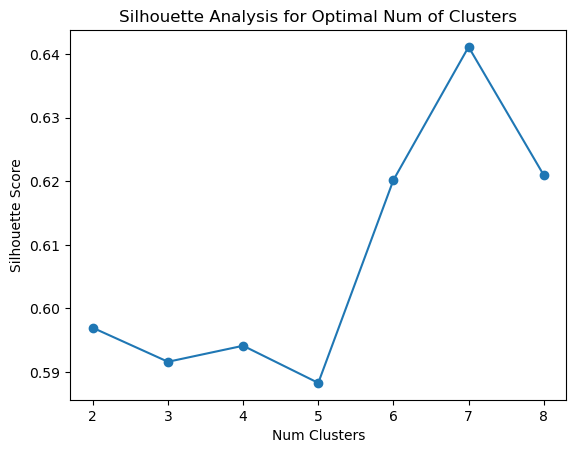

In [17]:
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Num Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Num of Clusters')
plt.show()

In [18]:
optimal_clusters = np.argmax(silhouette_scores) + min_clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(data_scaled)


C:\Users\franc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\franc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=7, random_state=0)

In [19]:
merged_df['Cluster'] = kmeans.labels_

C:\Users\franc\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [20]:
average_scores_per_cluster = merged_df.groupby('Cluster')['Value'].mean().sort_values()
 

In [21]:
average_scores_per_cluster

Cluster
4    2.337500
1    2.495000
3    2.645556
2    2.804000
5    2.950000
0    3.043333
6    3.136667
Name: Value, dtype: float64

In [22]:
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(average_scores_per_cluster.index)}


In [23]:
merged_df['NewCluster'] = merged_df['Cluster'].map(cluster_mapping)


C:\Users\franc\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [24]:
print("Average Scores per Cluster:")
print(merged_df.groupby('NewCluster')['Value'].mean().sort_index())


Average Scores per Cluster:
NewCluster
0    2.337500
1    2.495000
2    2.645556
3    2.804000
4    2.950000
5    3.043333
6    3.136667
Name: Value, dtype: float64


In [25]:
for new_cluster in range(optimal_clusters):
    districts_in_cluster = merged_df[merged_df['NewCluster'] == new_cluster]['DISTRICT'].tolist()
    print(f"Cluster {new_cluster}: {districts_in_cluster}")


Cluster 0: ['Barking and Dagenham', 'Bexley', 'Enfield', 'Havering']
Cluster 1: ['Brent', 'Hillingdon', 'Hounslow', 'Newham']
Cluster 2: ['Bromley', 'Croydon', 'Ealing', 'Greenwich', 'Haringey', 'Harrow', 'Redbridge', 'Sutton', 'Waltham Forest']
Cluster 3: ['Barnet', 'Hackney', 'Lewisham', 'Merton', 'Tower Hamlets']
Cluster 4: ['Islington', 'Kingston upon Thames', 'Lambeth', 'Southwark']
Cluster 5: ['Camden', 'City of Westminster', 'Hammersmith and Fulham']
Cluster 6: ['Kensington and Chelsea', 'Richmond upon Thames', 'Wandsworth']


In [26]:
cluster_labels_df = pd.DataFrame({
    'DISTRICT': merged_df['DISTRICT'],
    'Cluster': merged_df['NewCluster']
})
gdf_merged = gdf_dissolved.merge(cluster_labels_df, left_on="DISTRICT", right_on="DISTRICT", how="left")


In [27]:
gdf_merged = gdf_dissolved.merge(cluster_labels_df, left_on="DISTRICT", right_on="DISTRICT", how="left")


In [28]:
gdf_merged

,DISTRICT,geometry,NAME,GSS_CODE,LAGSSCODE,HECTARES,NONLD_AREA,Cluster
0,Barking and Dagenham,"POLYGON ((545714.899 181642.305, 545678.901 18...",GascoigneThamesRiverVillageAbbeyLongbridgeEast...,E05000032E05000039E05000038E05000041E05000026E...,E09000002E09000002E09000002E09000002E09000002E...,3779.934,169.150,0.0
1,Barnet,"POLYGON ((523293.197 186457.696, 523239.200 18...",UnderhillHigh BarnetWest HendonGolders GreenCo...,E05000060E05000056E05000062E05000053E05000046E...,E09000003E09000003E09000003E09000003E09000003E...,8674.835,0.000,3.0
2,Bexley,"POLYGON ((547962.296 170556.398, 547957.399 17...",LonglandsBlackfen & LamorbeySidcupSt. Mary's &...,E05011227E05011220E05011230E05011229E05011226E...,E09000004E09000004E09000004E09000004E09000004E...,6428.647,371.016,0.0
3,Brent,"POLYGON ((521058.398 183113.004, 521051.002 18...",Northwick ParkWembley CentralPrestonStonebridg...,E05000096E05000104E05000097E05000100E05000103E...,E09000005E09000005E09000005E09000005E09000005E...,4323.270,0.000,1.0
4,Bromley,"POLYGON ((540344.998 157603.096, 540339.803 15...",DarwinHayes and Coney HallBromley Common and K...,E05000117E05000119E05000108E05000110E05000107E...,E09000006E09000006E09000006E09000006E09000006E...,15013.487,0.000,2.0
5,Camden,"POLYGON ((527578.700 183595.996, 527478.003 18...",Swiss CottageHighgateKilburnBloomsburyHolborn ...,E05000144E05000137E05000140E05000129E05000138E...,E09000007E09000007E09000007E09000007E09000007E...,2178.934,0.000,5.0
6,City and County of the City of London,"POLYGON ((532715.002 180519.596, 532684.396 18...",Castle BaynardFarringdon WithoutFarringdon Wit...,E05009297E05009305E05009304E05009302E05009306E...,E09000001E09000001E09000001E09000001E09000001E...,314.943,24.546,NaN
7,City of Westminster,"POLYGON ((525804.503 180580.599, 525724.402 18...",St. James'sLancaster GateKnightsbridge and Bel...,E05000644E05000638E05000637E05000636E05000633E...,E09000033E09000033E09000033E09000033E09000033E...,2203.003,54.309,5.0
8,Croydon,"POLYGON ((532849.503 157330.104, 532867.502 15...",Coulsdon TownPurley & WoodcoteWaddonOld Coulsd...,E05011466E05011476E05011487E05011474E05011469E...,E09000008E09000008E09000008E09000008E09000008E...,8649.440,0.000,2.0
9,Ealing,"POLYGON ((510854.302 179385.201, 510880.002 17...",Norwood GreenSouthall GreenNortholt West EndDo...,E05000186E05000190E05000185E05000172E05000177E...,E09000009E09000009E09000009E09000009E09000009E...,5554.429,0.000,2.0


In [29]:
path_survey = 'final_cleaned_dataset.csv'
df_survey = pd.read_csv(path_survey)

C:\Users\franc\AppData\Local\Temp\ipykernel_3912\3797580443.py:2: DtypeWarning: Columns (11,76) have mixed types. Specify dtype option on import or set low_memory=False.
  df_survey = pd.read_csv(path_survey)


In [30]:
df_survey.rename(columns={
    'C2': 'DISTRICT', 
    'NQ135BD': 'TrustLevel',
    'Q62A':'ReliedLevel',
    'Q62B':'RespectLevel',
    'Q62TI':'FriendlyLevel',
    'NQ135BH':'AccountabilityLevel',

}, inplace=True)

In [31]:
columns_to_keep = ['DISTRICT', 'TrustLevel','ReliedLevel','RespectLevel','FriendlyLevel','AccountabilityLevel']
df = df_survey[columns_to_keep]

In [32]:
df

,DISTRICT,TrustLevel,ReliedLevel,RespectLevel,FriendlyLevel,AccountabilityLevel
0,Kensington and Chelsea,Tend to agree,Tend to agree,Tend to agree,Tend to agree,Tend to disagree
1,Kensington and Chelsea,Strongly agree,Tend to agree,Strongly agree,Strongly agree,Strongly agree
2,Kensington and Chelsea,Strongly agree,NaN,Strongly agree,NaN,Neither agree nor disagree
3,Kensington and Chelsea,Tend to agree,Tend to agree,Neither agree nor disagree,Tend to agree,Tend to agree
4,Kensington and Chelsea,Strongly agree,NaN,Tend to agree,NaN,Tend to agree
...,...,...,...,...,...,...
12362,Croydon,Strongly agree,Strongly agree,Strongly agree,Tend to agree,Strongly agree
12363,Croydon,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
12364,Croydon,Strongly agree,Tend to agree,Tend to agree,Strongly agree,Strongly agree
12365,Barking and Dagenham,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree


In [33]:
# create trust mapping for further analysis
mapping = {
    'Strongly agree': 5,
    'Tend to agree': 4,
    'Neither agree nor disagree': 3,
    'Tend to disagree': 2,
    'Strongly disagree': 1
}

In [34]:
df['TrustLevel'] = df['TrustLevel'].map(mapping)
df['ReliedLevel'] = df['ReliedLevel'].map(mapping)
df['RespectLevel'] = df['RespectLevel'].map(mapping)
df['FriendlyLevel'] = df['FriendlyLevel'].map(mapping)
df['AccountabilityLevel'] = df['AccountabilityLevel'].map(mapping)

C:\Users\franc\AppData\Local\Temp\ipykernel_3912\3532519841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TrustLevel'] = df['TrustLevel'].map(mapping)
C:\Users\franc\AppData\Local\Temp\ipykernel_3912\3532519841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ReliedLevel'] = df['ReliedLevel'].map(mapping)
C:\Users\franc\AppData\Local\Temp\ipykernel_3912\3532519841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [35]:
df

,DISTRICT,TrustLevel,ReliedLevel,RespectLevel,FriendlyLevel,AccountabilityLevel
0,Kensington and Chelsea,4.0,4.0,4.0,4.0,2.0
1,Kensington and Chelsea,5.0,4.0,5.0,5.0,5.0
2,Kensington and Chelsea,5.0,NaN,5.0,NaN,3.0
3,Kensington and Chelsea,4.0,4.0,3.0,4.0,4.0
4,Kensington and Chelsea,5.0,NaN,4.0,NaN,4.0
...,...,...,...,...,...,...
12362,Croydon,5.0,5.0,5.0,4.0,5.0
12363,Croydon,5.0,5.0,5.0,5.0,5.0
12364,Croydon,5.0,4.0,4.0,5.0,5.0
12365,Barking and Dagenham,5.0,5.0,5.0,5.0,5.0


In [36]:
df['TrustLevel'].unique()

array([ 4.,  5.,  3.,  1.,  2., nan])

In [37]:
nan_counts = df.groupby('DISTRICT').apply(lambda x: x.isnull().sum())


In [38]:
nan_counts

,DISTRICT,TrustLevel,ReliedLevel,RespectLevel,FriendlyLevel,AccountabilityLevel
DISTRICT,,,,,,
Barking and Dagenham,0,1,0,0,3,3
Barnet,0,0,6,2,9,17
Bexley,0,0,2,0,2,4
Brent,0,0,3,2,13,23
Bromley,0,2,2,1,4,15
Camden,0,2,7,5,12,36
Croydon,0,0,3,2,9,60
Ealing,0,0,3,1,11,24
Enfield,0,2,4,4,5,20


In [39]:
#count number of nan
total_nans = df.isna().sum().sum()
print(total_nans)

2019


df = df.dropna(subset=['TrustLevel'])
df = df.dropna(subset=['ReliedLevel'])
df = df.dropna(subset=['RespectLevel'])
df = df.dropna(subset=['FriendlyLevel'])
df = df.dropna(subset=['AccountabilityLevel'])

In [40]:
respondents_per_district = df['DISTRICT'].value_counts()

print(respondents_per_district)

DISTRICT
Haringey                  394
Barking and Dagenham      394
Camden                    393
Hammersmith and Fulham    393
Greenwich                 392
Islington                 390
Waltham Forest            389
Westminster               389
Bromley                   389
Kensington and Chelsea    388
Brent                     388
Sutton                    388
Harrow                    387
Newham                    387
Croydon                   387
Wandsworth                387
Lewisham                  386
Enfield                   386
Lambeth                   386
Barnet                    385
Southwark                 385
Redbridge                 385
Richmond upon Thames      384
Bexley                    384
Kingston upon Thames      384
Hillingdon                384
Hackney                   384
Merton                    382
Ealing                    382
Hounslow                  380
Tower Hamlets             378
Havering                  377
Name: count, dtype: int64


In [41]:
df['AverageTrustScore'] = df[['TrustLevel','ReliedLevel', 'RespectLevel', 'FriendlyLevel', 'AccountabilityLevel']].mean(axis=1)
average_trust_scores = df.groupby('DISTRICT')['AverageTrustScore'].mean().reset_index()


C:\Users\franc\AppData\Local\Temp\ipykernel_3912\609213481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AverageTrustScore'] = df[['TrustLevel','ReliedLevel', 'RespectLevel', 'FriendlyLevel', 'AccountabilityLevel']].mean(axis=1)


In [42]:
average_trust_scores

,DISTRICT,AverageTrustScore
0,Barking and Dagenham,4.044924
1,Barnet,4.108485
2,Bexley,4.034462
3,Brent,4.140679
4,Bromley,4.062725
5,Camden,3.786352
6,Croydon,3.997761
7,Ealing,4.098517
8,Enfield,3.751511
9,Greenwich,4.020961


In [43]:
average_trust_scores['DISTRICT'] = average_trust_scores['DISTRICT'].replace('Westminster', 'City of Westminster')

In [44]:
gdf_merged_with_trust = gdf_merged.merge(average_trust_scores, on='DISTRICT', how='left')

C:\Users\franc\AppData\Local\Temp\ipykernel_3912\1354662995.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  gdf_merged_with_trust.plot(column='Cluster', cmap=plt.cm.get_cmap('viridis', optimal_clusters), legend=True, ax=ax)


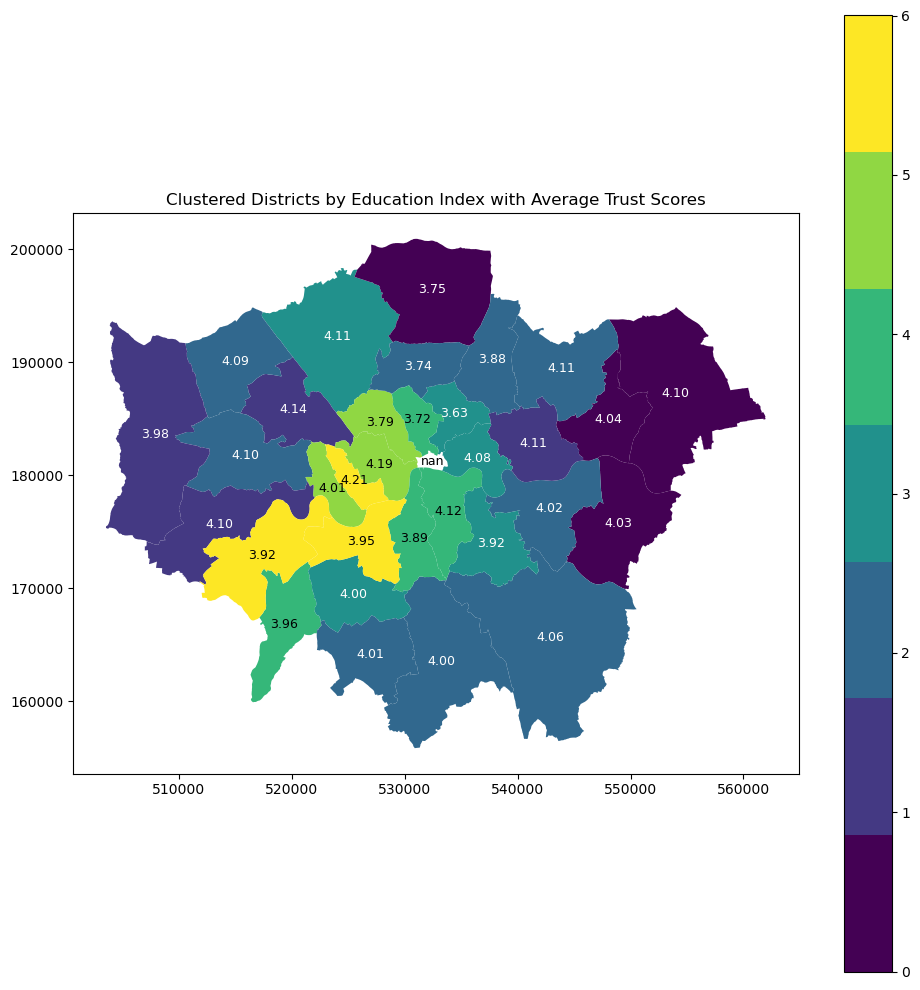

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_merged_with_trust.plot(column='Cluster', cmap=plt.cm.get_cmap('viridis', optimal_clusters), legend=True, ax=ax)


for idx, row in gdf_merged_with_trust.iterrows():
    trust_score = row['AverageTrustScore']
    centroid = row['geometry'].centroid
    offset_x = centroid.x
    offset_y = centroid.y
    text_color = 'white' if row['Cluster'] in [0, 1, 2, 3] else 'black' 
    ax.text(offset_x, offset_y, f'{trust_score:.2f}', color=text_color, fontsize=9, ha='center', va='center')

plt.title("Clustered Districts by Education Index with Average Trust Scores")
plt.tight_layout()
plt.savefig('clustered_districts_with_scores.png')
plt.show()

ANOVA TEST

In [46]:
# ANOVA test
anova = stats.f_oneway(
    *[gdf_merged_with_trust[gdf_merged_with_trust['Cluster'] == i]['AverageTrustScore'].dropna() for i in range(optimal_clusters)]
)

In [47]:
print("ANOVA test result:", anova)

ANOVA test result: F_onewayResult(statistic=0.4835861617434453, pvalue=0.814186702401294)


In [48]:
average_trust_by_cluster = gdf_merged_with_trust.groupby('Cluster')['AverageTrustScore'].mean().reset_index()
print("Average Trust by Cluster:")
print(average_trust_by_cluster)

Average Trust by Cluster:
   Cluster  AverageTrustScore
0      0.0           3.982691
1      1.0           4.084168
2      2.0           3.999797
3      3.0           3.949070
4      4.0           3.923954
5      5.0           3.995512
6      6.0           4.023895
